In [373]:
import copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 2 Linear regression with one variable

In [374]:
df = pd.read_csv('ex1data1.txt', names=['population', 'profit'])
df.head( )

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [375]:
df.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## 2.1 Plotting the Data

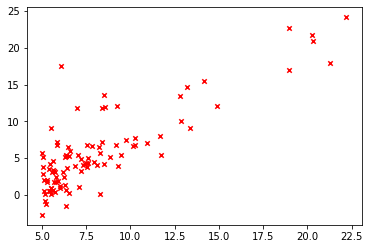

In [376]:
plt.scatter(df['population'], df['profit'], c = 'r', marker = 'x', s = 20)

## 2.2 Gradient Descent

### Cost Function
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [377]:
def computeCost(X,y,theta):
    inner = np.power(X*theta.T-y,2)
    return np.sum(inner)/(2*len(y))

In [378]:
df.insert(0, 'Ones', 1)
df.head( )

,Ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [379]:
# set X (training data) and y (target variable)
cols = df.shape[1]
X = df.iloc[:,0:cols-1]#X是所有行，去掉最后一列
y = df.iloc[:,cols-1:cols]#X是所有行，最后一列

In [380]:
X.head()#head()是观察前5行

,Ones,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [381]:
y.head()#head()是观察前5行

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [382]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0,0]))

In [383]:
theta

matrix([[0, 0]])

In [384]:
computeCost(X, y, theta)

32.072733877455676

### Gradient descent

$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

In [434]:
def gradientdescent(X, y, theta, alpha, iters):
    cost = np.zeros(iters)
    for i in range(iters):
        put_list = []
        for j in range(len(X.T)):
            put_list.append((theta[0,j] - alpha*((X*theta.T - y).T*X[:,j])/(2*len(X)))[0,0])
        theta = copy.deepcopy(np.matrix(np.array(put_list)))
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [459]:
alpha = 0.01
iters = 10000
theta = np.matrix(np.array([0,0]))

In [460]:
theta, cost = gradientdescent(X, y, theta, alpha, iters)

In [461]:
theta

matrix([[-3.89529855,  1.19298519]])

In [462]:
predict1 = [[1,3.5]]*theta.T
predict1

matrix([[0.28014961]])

In [463]:
predict2 = [[1,7]]*theta.T
predict2

matrix([[4.45559777]])

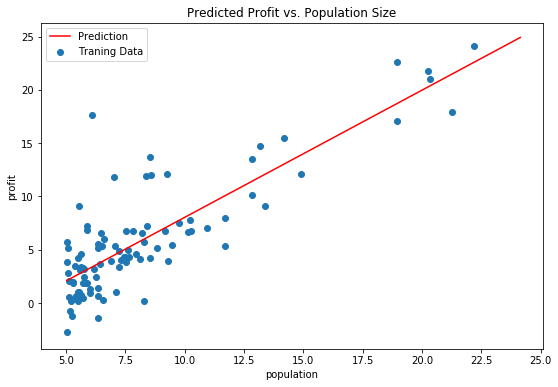

In [464]:
x = np.linspace(df.population.min(), df.profit.max(), 100)
f = theta[0,0] + (theta[0,1] * x)

fig, ax = plt.subplots(figsize=(9,6))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('population')
ax.set_ylabel('profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

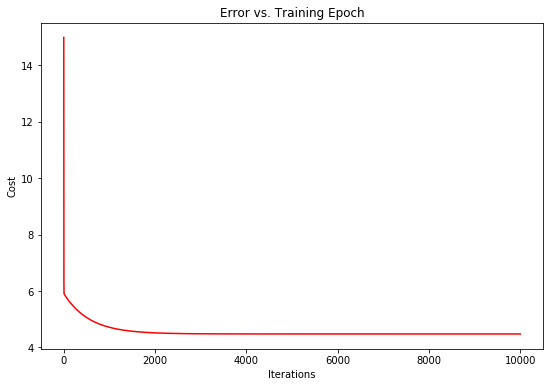

In [465]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 3. Multi-var batch gradient decent

In [443]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [444]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [445]:
# add ones column
data2.insert(0, 'Ones', 1)
data2.head()

,Ones,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [446]:
# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

In [447]:
# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

In [448]:
# perform linear regression on the data set
g2, cost2 = gradientdescent(X2, y2, theta2, alpha, iters)

In [450]:
# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13195724498874623

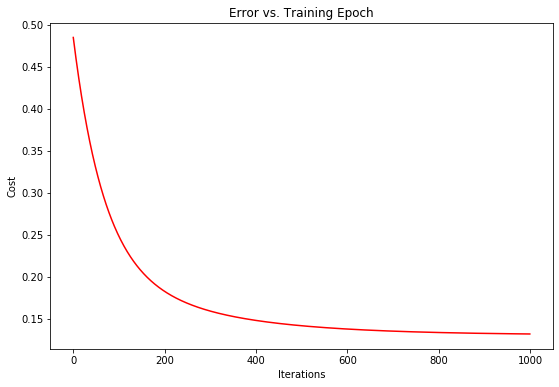

In [451]:
fig, ax = plt.subplots(figsize=(9,6))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

In [452]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

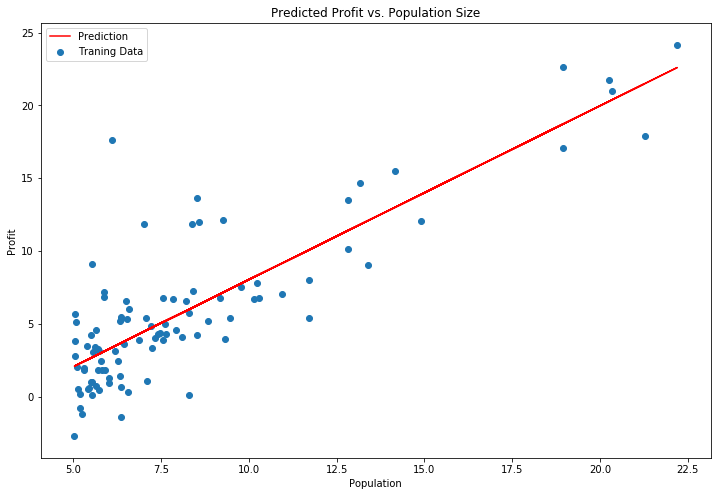

In [455]:
x = np.array(X[:, 1].A1)
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(df.population, df.profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 4. Normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [457]:
# 正规方程
def normalEqn(X, y):
    theta = np.linalg.inv(X.T*X)*X.T*y#X.T@X等价于X.T.dot(X)
    return theta

In [458]:
final_theta2=normalEqn(X, y)#感觉和批量梯度下降的theta的值有点差距
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [466]:
theta

matrix([[-3.89529855,  1.19298519]])

In [467]:
#梯度下降得到的结果如上，只要梯度下降迭代的次数很大了两个还是很接近的